# Convert splitting to density, and perform other useful calcs you might want

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.63'

In [3]:
df_combo=pd.read_excel('FI_fitting_w_sec_phases.xlsx')
df_combo.head()

,filename_x,Splitting,Split_σ,Split_err_abs,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,...,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Carb_Diad_Ratio,SO2_Diad_Ratio
0,K21-59-FI#1_CRR_DiadFit,103.057930,0.004029,0.005424,1286.035372,0.003584,591.792421,1286.035422,605.447362,0.434264,...,K21-59-FI#1.txt,1151.271035,49.794305,26.997104,Spline,NaN,NaN,NaN,NaN,0.032879
1,K21-59-FI#2,103.011311,0.011688,0.016082,1286.157455,0.009950,227.655256,1286.157505,198.574397,0.409721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,K21-59-FI#3,103.046227,0.003908,0.005329,1286.074215,0.003398,570.233153,1286.074265,580.899302,0.422487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,K21-61-FI#1-rep1_CRR_DiadFit,103.312261,0.031987,0.042104,1285.431180,0.029323,66.226323,1285.431180,80.426681,0.570436,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,K21-61-FI#1-rep2_CRR_DiadFit,103.305046,0.003063,0.004135,1285.435753,0.002712,607.647353,1285.435803,895.504629,0.568594,...,K21-61-FI#1-rep2.txt,NaN,NaN,NaN,NaN,1090.919723,900.825267,43.734455,0.38602,NaN


In [4]:
df=pf.calculate_density_ucb(df_combo=df_combo,
  Ne_pickle_str='polyfit_data.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

,filename,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,...,Model_name,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Carb_Diad_Ratio,SO2_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,K21-59-FI#1_CRR_DiadFit,K21-59-FI#1.txt,0.033914,0.004195,0.001609,0.003875,102.835846,0.004061,0.000571,0.004029,...,Spline,NaN,NaN,NaN,NaN,0.032879,43795,0.997845,0.997840,0.997851
1,K21-59-FI#2,NaN,0.015169,0.006073,0.004627,0.003934,102.788537,0.011676,0.000565,0.011688,...,NaN,NaN,NaN,NaN,NaN,NaN,44393,0.997837,0.997832,0.997843
2,K21-59-FI#3,NaN,0.028598,0.004191,0.001561,0.003890,102.822428,0.003940,0.000558,0.003908,...,NaN,NaN,NaN,NaN,NaN,NaN,45146,0.997828,0.997823,0.997834
3,K21-61-FI#1-rep1_CRR_DiadFit,NaN,0.133407,0.013223,0.012649,0.003855,103.086937,0.031922,0.000554,0.031987,...,NaN,NaN,NaN,NaN,NaN,NaN,45944,0.997819,0.997814,0.997824
4,K21-61-FI#1-rep2_CRR_DiadFit,K21-61-FI#1-rep2.txt,0.130418,0.004040,0.001230,0.003848,103.079394,0.003105,0.000551,0.003063,...,NaN,1090.919723,900.825267,43.734455,0.38602,NaN,46247,0.997816,0.997810,0.997821


In [7]:
sorted_df = df.sort_values('sec since midnight')
sorted_df.to_excel('Merged_df_densimeter.xlsx')

## Lets make some useful plots

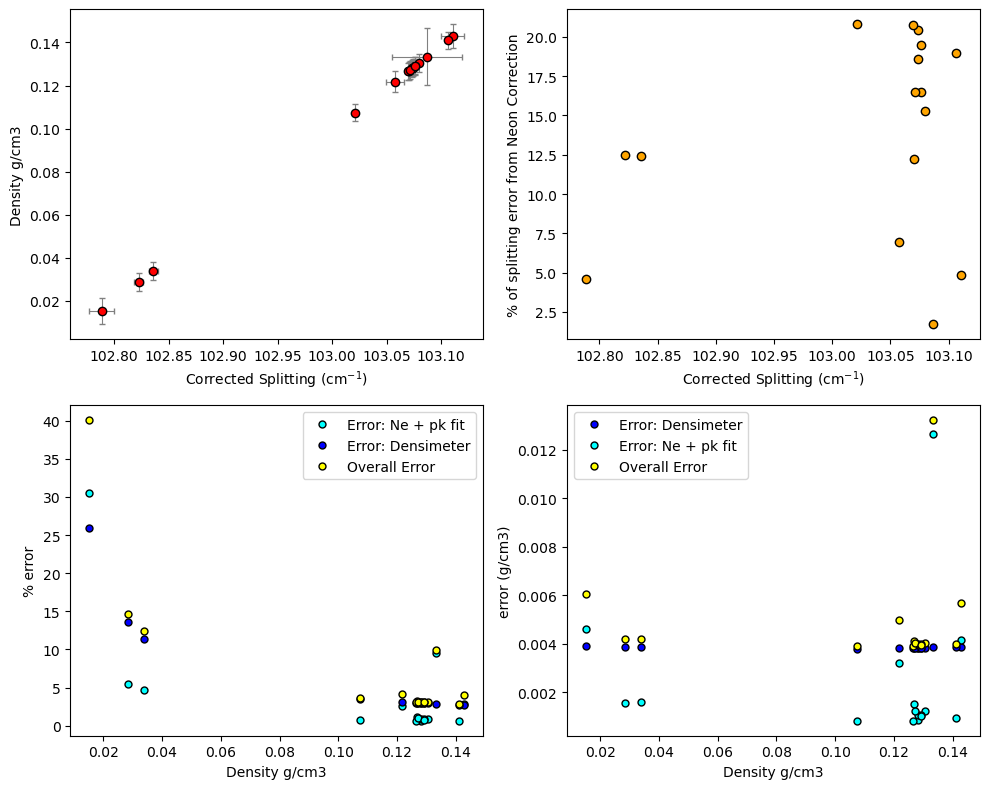

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## Functions for fluid inclusions

In [ ]:
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=1150+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
Pressure_SW96.head()

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,0.093190,9.319002,1423.15,0.033914
1,0.041177,4.117742,1423.15,0.015169
2,0.078309,7.830926,1423.15,0.028598
3,0.392829,39.282919,1423.15,0.133407
4,0.383182,38.318188,1423.15,0.130418


In [ ]:
    'Preferred D_σ_pkfit': 0,
     'Preferred D_σ_dens': 0,

SyntaxError: illegal target for annotation (2122712176.py, line 1)